In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from pandas import Series, DataFrame
import xgboost as xgb

#Individual level data 

In [2]:
df = pd.read_csv('client_individual.csv', delimiter=',') #User-Session level conversion file
df.shape
df.head()
df=df.dropna()

In [3]:
df.dtypes

sl_userid                object
sl_sessionid             object
fullReferrer             object
campaign                 object
medium                   object
channelGrouping          object
userType                 object
adContent                object
avg_bounce_rate         float64
operatingSystem          object
browser                  object
deviceCategory           object
region                   object
metro                    object
city                     object
latitude                float64
longitude               float64
networkLocation          object
regionIsoCode            object
avg_pricing_duration    float64
pagePath                  int64
dtype: object

# Correlation

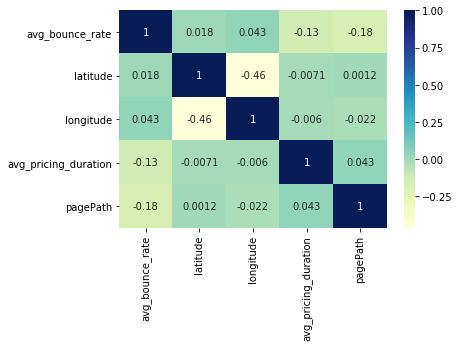

In [4]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

This gives correlation between only continuous variables. 

# Setting up x and y

In [5]:
y = df['pagePath']
x = df[['avg_bounce_rate', 'avg_pricing_duration','fullReferrer','channelGrouping', 'userType', 'deviceCategory', 'city', 'networkLocation']]
y.value_counts()*100/len(y) 

0    97.916853
1     2.083147
Name: pagePath, dtype: float64

This is a imbalanced dataset,with the minority class being just 2.4% 

In [6]:
X=pd.get_dummies(x,drop_first=True)   # converting categorical variables to dummy variables

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)  

Using 'stratify' to split into test and train dataset because it is a imbalanced dataset

# Logistic Regression

### Choosing between different models: Here below there are 4 models : 
1. logistic regression model of threshold = 0.3
2. logistic regression with l1 regularisation  and threshold = 0.3
3. logistic regression with class weight = 'balanced'  and threshold = 0.5
4. logistic regression with l1 regularisation,class weight = 'balanced'  and threshold = 0.5

In [8]:
lr_clf = LogisticRegression(random_state=42)
lr_clf_reg = LogisticRegression(random_state=42,penalty='l1')
lr_clf_bal = LogisticRegression(random_state=42,class_weight='balanced')
lr_clf_bal_reg = LogisticRegression(random_state=42,class_weight='balanced',penalty='l1')

lr_clf.fit(x_train, y_train)
lr_clf_reg.fit(x_train,y_train)
lr_clf_bal.fit(x_train,y_train)
lr_clf_bal_reg.fit(x_train,y_train)

y_pred_prob_tr = lr_clf.predict_proba(x_train)
y_pred_prob1_tr = lr_clf_reg.predict_proba(x_train)
y_pred_prob2_tr = lr_clf_bal.predict_proba(x_train)
y_pred_prob3_tr = lr_clf_bal_reg.predict_proba(x_train)

y_pred_prob = lr_clf.predict_proba(x_test)
y_pred_prob1 = lr_clf_reg.predict_proba(x_test)
y_pred_prob2 = lr_clf_bal.predict_proba(x_test)
y_pred_prob3 = lr_clf_bal_reg.predict_proba(x_test)

In [9]:
y_pred_tr=np.where(y_pred_prob_tr[:,1]>0.3,1,0)
y_pred1_tr=np.where(y_pred_prob1_tr[:,1]>0.3,1,0)
y_pred2_tr=np.where(y_pred_prob2_tr[:,1]>0.5,1,0)
y_pred3_tr=np.where(y_pred_prob3_tr[:,1]>0.5,1,0)


y_pred=np.where(y_pred_prob[:,1]>0.3,1,0)
y_pred1=np.where(y_pred_prob1[:,1]>0.3,1,0)
y_pred2=np.where(y_pred_prob2[:,1]>0.5,1,0)
y_pred3=np.where(y_pred_prob3[:,1]>0.5,1,0)

print('----------------------------------------normal model------------------------------------------------------')
#normal model
#train
print("Classification report for normal model - train ")
print("F1 Score: ", f1_score(y_train, y_pred_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob_tr[:,1]))
print()
print(classification_report(y_train, y_pred_tr))

#test
print("Classification report for normal model - test ")
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred))

print('----------------------------------------l2 regularized model------------------------------------------------------')

#l2 regularized model
#train
print("Classification report for reg model - train ")
print("F1 Score: ", f1_score(y_train, y_pred1_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob1_tr[:,1]))
print()
print(classification_report(y_train, y_pred1_tr))

#test
print("Classification report for reg model- test ")
print("F1 Score: ", f1_score(y_test, y_pred1))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob1[:,1]))
print()
print(classification_report(y_test, y_pred1))



----------------------------------------normal model------------------------------------------------------
Classification report for normal model - train 
F1 Score:  0.4659606656580938
AUROC:  0.9633517252284562

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     45932
           1       0.46      0.47      0.47       977

    accuracy                           0.98     46909
   macro avg       0.72      0.73      0.73     46909
weighted avg       0.98      0.98      0.98     46909

Classification report for normal model - test 
F1 Score:  0.35406698564593303
AUROC:  0.9550303730380821

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19686
           1       0.35      0.35      0.35       419

    accuracy                           0.97     20105
   macro avg       0.67      0.67      0.67     20105
weighted avg       0.97      0.97      0.97     20105

---------------------------

In [10]:
print('----------------------------------------balanced model------------------------------------------------------')

# balanced model
#train
print("Classification report for balanced model- train ")
print("F1 Score: ", f1_score(y_train, y_pred2_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob2_tr[:,1]))
print()
print(classification_report(y_train, y_pred2_tr))

#test
print("Classification report for balanced model- test")
print("F1 Score: ", f1_score(y_test, y_pred2))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob2[:,1]))
print()
print(classification_report(y_test, y_pred2))

print('----------------------------------------balanced - l2 reg model------------------------------------------------------')

#balanced - l2 reg model
#train
print("Classification report for balanced reg model- train")
print("F1 Score: ", f1_score(y_train, y_pred3_tr))
print("AUROC: ", roc_auc_score(y_train, y_pred_prob3_tr[:,1]))
print()
print(classification_report(y_train, y_pred3_tr))

#test
print("Classification report for balanced reg model - test ")
print("F1 Score: ", f1_score(y_test, y_pred3))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob3[:,1]))
print()
print(classification_report(y_test, y_pred3))

----------------------------------------balanced model------------------------------------------------------
Classification report for balanced model- train 
F1 Score:  0.30848930481283426
AUROC:  0.9704618085691358

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     45932
           1       0.18      0.94      0.31       977

    accuracy                           0.91     46909
   macro avg       0.59      0.93      0.63     46909
weighted avg       0.98      0.91      0.94     46909

Classification report for balanced model- test
F1 Score:  0.28950448692937963
AUROC:  0.9550243112813899

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     19686
           1       0.17      0.89      0.29       419

    accuracy                           0.91     20105
   macro avg       0.59      0.90      0.62     20105
weighted avg       0.98      0.91      0.94     20105

-----------------------

The best model is one which is class_weight as balanced and has a threshold of 0.5. It has a recall of 0.86 and precision of 0.17 for test data.

# Feature importance

In [11]:
#the reg bal model
weights = Series(lr_clf_bal_reg.coef_[0],
                 index=x_train.columns.values)
weights.sort_values()
weights2 = DataFrame(dict(weights = weights, weights_abs = weights.abs()))
weights2=weights2.sort_values(by='weights_abs',ascending=False)
weights2.head()

,weights,weights_abs
networkLocation_amanah tech inc.,9.104657,9.104657
fullReferrer_myxyz.sharepoint.com/_layouts/15/sharepoint.aspx,8.505593,8.505593
fullReferrer_d2a952y4d7suw.cloudfront.net/,8.240697,8.240697
networkLocation_abilene christian university,8.133178,8.133178
city_Kirkland,7.970729,7.970729


This seems to be right when looked at % of conversions from these.

In [12]:
print("Total number of features:", len(weights2['weights_abs']))
print("Number of non-zero weight features is:", (weights2['weights_abs']>0).sum())

Total number of features: 3661
Number of non-zero weight features is: 330


In [13]:
weights2.to_csv('weights2.csv')

# Random Forest

In [14]:
rf_clf = RandomForestClassifier(random_state=70)
rf_clf_bal = RandomForestClassifier(class_weight='balanced',random_state=70)

rf_clf.fit(x_train, y_train)
rf_clf_bal.fit(x_train, y_train)

y_pred_prob = rf_clf.predict_proba(x_test)
y_pred_prob1 = rf_clf_bal.predict_proba(x_test)

In [15]:
y_pred=np.where(y_pred_prob[:,1]>0.3,1,0)
y_pred1=np.where(y_pred_prob1[:,1]>0.3,1,0) #lowered the threshold

#normal model
print("Classification report for normal RF classifier")
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred))

#balanced model
print("Classification report for balanced RF classifier")
print("F1 Score: ", f1_score(y_test, y_pred1))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob1[:,1]))
print()
print(classification_report(y_test, y_pred1))

Classification report for normal RF classifier
F1 Score:  0.39181916038751347
AUROC:  0.8785793157828504

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19686
           1       0.36      0.43      0.39       419

    accuracy                           0.97     20105
   macro avg       0.67      0.71      0.69     20105
weighted avg       0.97      0.97      0.97     20105

Classification report for balanced RF classifier
F1 Score:  0.38699186991869916
AUROC:  0.8798229457858304

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     19686
           1       0.29      0.57      0.39       419

    accuracy                           0.96     20105
   macro avg       0.64      0.77      0.68     20105
weighted avg       0.98      0.96      0.97     20105



Balanced has a higher recall

# Tuning it further

In [16]:
tuned_parameters = [{'n_estimators':[10,20,50],
                     'max_depth':[5,10]}]
clf1 = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5)
clf1.fit(x_train, y_train)
print(clf1.best_params_)

{'max_depth': 5, 'n_estimators': 10}


In [17]:
rf_clf1 = RandomForestClassifier(max_depth= 5,n_estimators= 10,class_weight='balanced',random_state=42)
rf_clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [18]:
y_pred_prob = rf_clf1.predict_proba(x_test)
y_pred=np.where(y_pred_prob[:,1]>0.5,1,0)

In [19]:
print("F1 Score: ", f1_score(y_test, y_pred))
print("AUROC: ", roc_auc_score(y_test, y_pred_prob[:,1]))
print()
print(classification_report(y_test, y_pred))

F1 Score:  0.13641986216646051
AUROC:  0.9069954369520324

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     19686
           1       0.07      0.92      0.14       419

    accuracy                           0.76     20105
   macro avg       0.54      0.84      0.50     20105
weighted avg       0.98      0.76      0.84     20105



The tuned model has a higher recall.

# Get Feature Importance for RF

In [20]:
#balanced model before tuning
#feature_importances = pd.DataFrame(rf_clf_bal.feature_importances_,
#                                   index = x_train.columns,
#                                    columns=['importance']).sort_values('importance',ascending=False)
feat_importances = pd.Series(rf_clf_bal.feature_importances_, index=x_train.columns)
feat_importances.sort_values(ascending=False).head(10) 
                                  

avg_bounce_rate                                   0.129596
deviceCategory_mobile                             0.118217
avg_pricing_duration                              0.098831
fullReferrer_Referrer A.org/en-us/Plan/Results    0.059601
channelGrouping_Display                           0.052407
channelGrouping_Referral                          0.044227
channelGrouping_Paid Search                       0.022346
fullReferrer_googleads                            0.021865
city_Nashville                                    0.021402
userType_Returning Visitor                        0.020421
dtype: float64